# Experimentos sobre overfit

Procuraremos aproximar a função subjacente a um fenômeno a partir de funções polinomiais de complexidade crescente, estimadas (ou treinadas) para prever pontos de amostras do fenômeno (gerados com algum nível de ruído).

Veremos assim que diferentes níveis de complexidade das funções de aproximação geram resultados melhores ou piores, de forma diferente entre os conjuntos de treinamento e teste.

Esses experimentos poderão trazer uma compreensão mais intuitiva dos conceitos de underfiting e overfiting, como detectar sua ocorrência e o que pode ser feito para limitar seus efeitos.

Código inicial para visualizar o resultado dos experimentos, extraídos da documentação do scikit-learn em: 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
# Configurações do Gráfico
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
# Função subjacente ao fenômeno, pode ser alterada facilmente, 
# com composições de outras funções matemáticas primitivas

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
# plot da função fenômeno e as amostras com ruído
def plot_basico(graus):
    for i in range(len(graus)):        
        ax = plt.subplot(1, len(graus), i + 1)
        plt.setp(ax, xticks=(), yticks=())
        
        # pipeline de predição: features polinomiais + regressão linear
        polynomial_features = PolynomialFeatures(degree=graus[i],
                                                 include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)
        
        # Avalia o modelo com crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error", cv=10)
        # plota as previsões
        X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo")
        
        # plota a função fenômeno (ground truth)
        plt.plot(X_test, true_fun(X_test), label="Função fenômeno")
        
        # plota amostras de treinamento
        plt.scatter(X, y, edgecolor='b', s=20, label="Amostras")
        
        # detalhes do gráfico
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-1.5, 1.5))
        plt.legend(loc="best")
        
        # título do gráfico: 
        # grau do polinômio, erro de previsão (fora da amostra de treinamento) e desvio padrão
        plt.title(f"Grau {graus[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})\nR2 = {pipeline.score(X[:, np.newaxis],y):.3%}")
    plt.show()

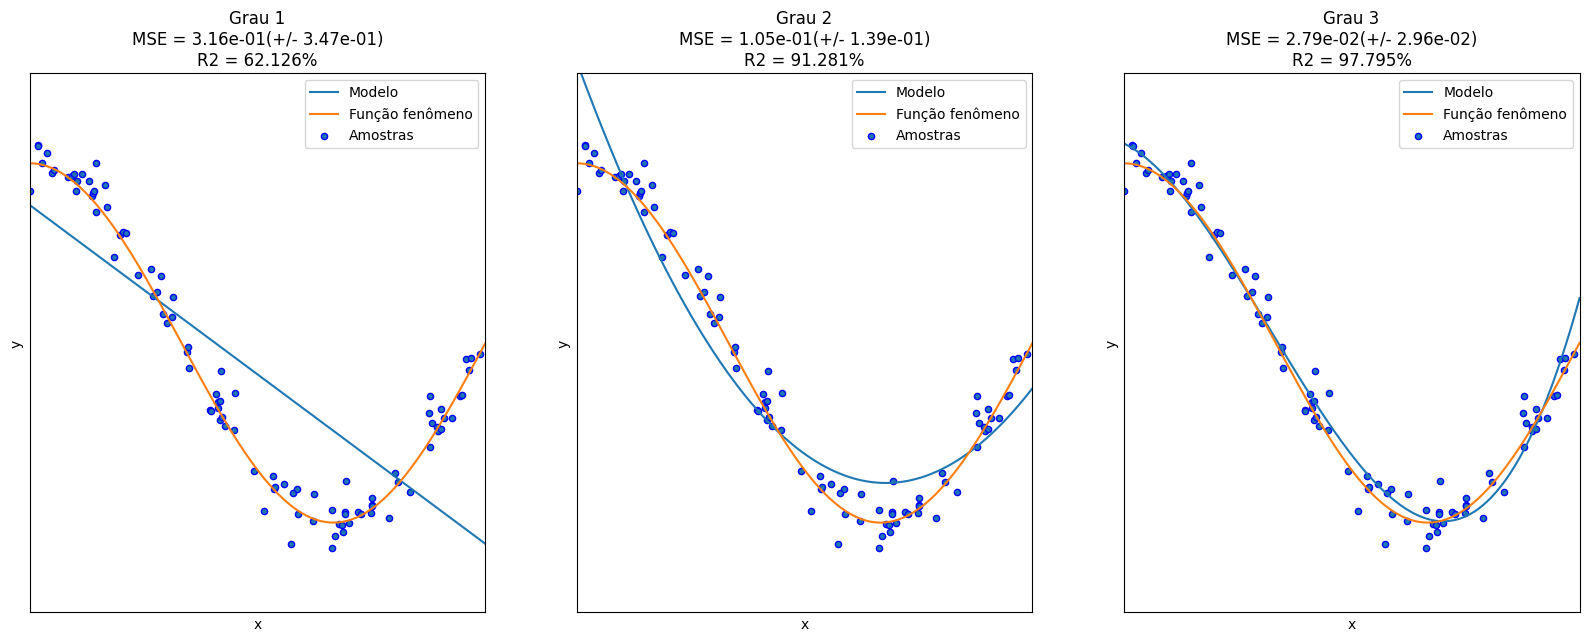

In [5]:
import ast
#@title Parâmetros de tamanho da amostra, ruído e grau
# Semente do gerador aleatório: variar para criar amostras diferentes dos dados do fenômeno
np.random.seed(1)

# Tamanho da amostra de treinamento
n_samples = 97 #@param {type:"slider", min:0, max:1000, step:1}

# nível de ruído aleatório
noise = 0.1 #@param {type:"number"}

# Variável independente ou feature
X = np.sort(np.random.rand(n_samples))

# Variável dependente ou target
# Resulta da função do fenômeno com um certo nível de ruído aleatório
y = true_fun(X) + np.random.randn(n_samples) * noise

graus = "[1,2,3]" #@param {type:"string"}
lista_graus =  ast.literal_eval(graus)

plot_basico(lista_graus)

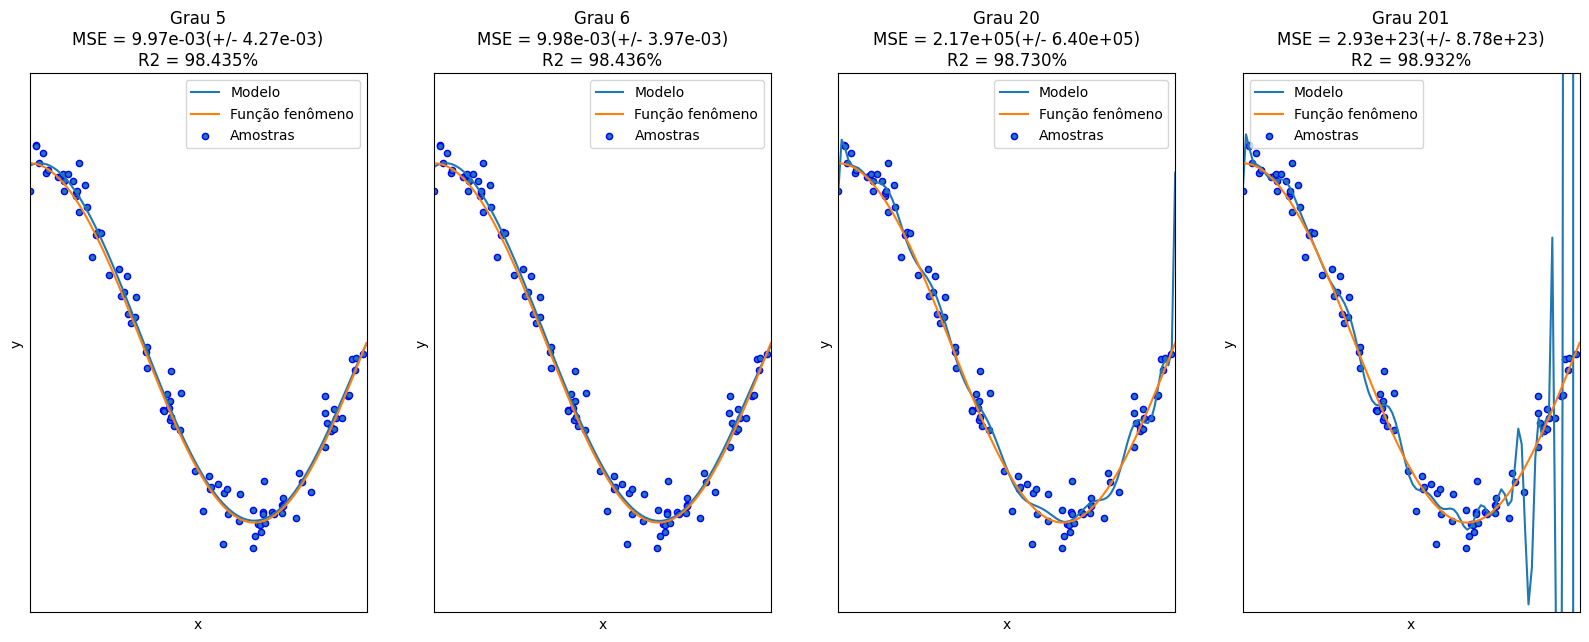

In [6]:
import ast
#@title Parâmetros de tamanho da amostra, ruído e grau
# Semente do gerador aleatório: variar para criar amostras diferentes dos dados do fenômeno
np.random.seed(1)

# Tamanho da amostra de treinamento
n_samples = 97 #@param {type:"slider", min:0, max:1000, step:1}

# nível de ruído aleatório
noise = 0.1 #@param {type:"number"}

# Variável independente ou feature
X = np.sort(np.random.rand(n_samples))

# Variável dependente ou target
# Resulta da função do fenômeno com um certo nível de ruído aleatório
y = true_fun(X) + np.random.randn(n_samples) * noise

graus = "[5,6,20, 201]" #@param {type:"string"}
lista_graus =  ast.literal_eval(graus)

plot_basico(lista_graus)

## Atividades

1. Altere a função subjacente `true_fun()` para outras funções matemáticas e execute toda uma nova análise (copiando células anteriores) e compare os resultados com a função original `np.cos(1.5 * np.pi * X)`

Sugestões de funções a serem exploradas, com composições de: polinômios, log, exp, trigonométricas (sen, cos, tan...)
https://numpy.org/doc/1.18/reference/routines.math.html

2. Variar outros parâmetros do experimento, como:
   - semente aleatória: np.random.seed(k) com k = [0, 1, 2]
   - número de amostras: n_samples = [30, 50, 100]
   - nível de ruído: noise = [0.1, 0.2, 0.5]

Como os novos parâmetros afetam o nível de erro e grau do modelo mais adequado

3. Que conclusões gerais você consegue estabelecer sobre overfit, apoiado nos seus experimentos?